In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('dataset_sudeste_simples_realista_outliers-1k.csv')
print(df.head(10))

   id  idade    renda          cidade categoria  nota feedback
0   1   65.0  8912.27  Belo Horizonte         B   NaN      Bom
1   2   51.0  2668.90  Belo Horizonte         B   0.6     Ruim
2   3   35.0      NaN         Vitória         B   4.4  Regular
3   4   45.0  3417.56       São Paulo         B   1.3      Bom
4   5   56.0  7536.57  Rio de Janeiro         A   8.6      NaN
5   6   53.0  7825.52       São Paulo         B   8.2  Regular
6   7   28.0  3045.86  Belo Horizonte         B   3.8  Regular
7   8   20.0  9873.58  Rio de Janeiro         B   4.6      Bom
8   9   21.0  3103.06         Vitória         B   8.0  Regular
9  10   56.0  7666.91  Belo Horizonte         A   9.2      Bom


In [3]:
print(df.tail(10))

       id  idade     renda          cidade categoria  nota feedback
990   991   43.0  10996.85  Rio de Janeiro         A   3.4  Regular
991   992   21.0   2181.99  Rio de Janeiro         B   0.5      Bom
992   993   18.0  11640.36       São Paulo         B   6.1     Ruim
993   994   27.0   4128.05         Vitória         B   9.8      Bom
994   995   65.0   9331.14       São Paulo         A   5.9     Ruim
995   996   46.0  11802.07         Vitória         B   0.8     Ruim
996   997   69.0   4388.74         Vitória         A   2.7     Ruim
997   998   66.0   9870.78  Belo Horizonte         B   7.7      Bom
998   999   58.0   7311.47       São Paulo         B   5.8     Ruim
999  1000   39.0  10524.22         Vitória         A   3.9  Regular


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         1000 non-null   int64  
 1   idade      993 non-null    float64
 2   renda      990 non-null    float64
 3   cidade     992 non-null    object 
 4   categoria  990 non-null    object 
 5   nota       986 non-null    float64
 6   feedback   992 non-null    object 
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [6]:
df.describe()

,id,idade,renda,nota
count,1000.000000,993.000000,990.000000,986.000000
mean,500.500000,42.886203,7213.230515,5.136207
std,288.819436,16.023802,4092.152138,2.895801
min,1.000000,3.000000,473.610000,-3.600000
25%,250.750000,29.000000,3792.745000,2.800000
50%,500.500000,43.000000,7158.405000,5.200000
75%,750.250000,56.000000,10340.997500,7.400000
max,1000.000000,120.000000,45312.730000,12.700000


In [7]:
print(df.isnull().sum())

id            0
idade         7
renda        10
cidade        8
categoria    10
nota         14
feedback      8
dtype: int64


In [10]:
imputer_media = SimpleImputer(strategy='mean')

In [11]:
df[['idade', 'nota']] = imputer_media.fit_transform(df[['idade', 'nota']])

In [12]:
imputer_mediana = SimpleImputer(strategy='mean')
df[['renda']] = imputer_media.fit_transform(df[['renda']])

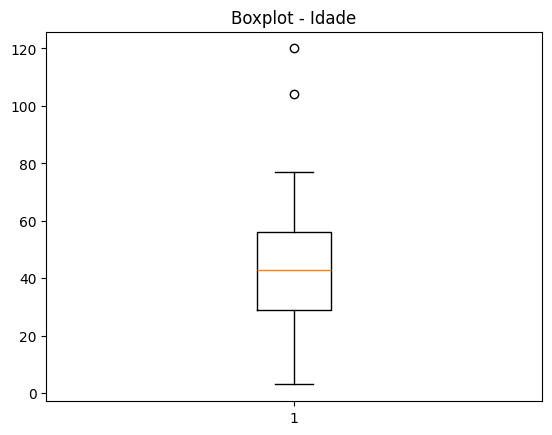

In [14]:
plt.boxplot(df['idade'])
plt.title("Boxplot - Idade")
plt.show()

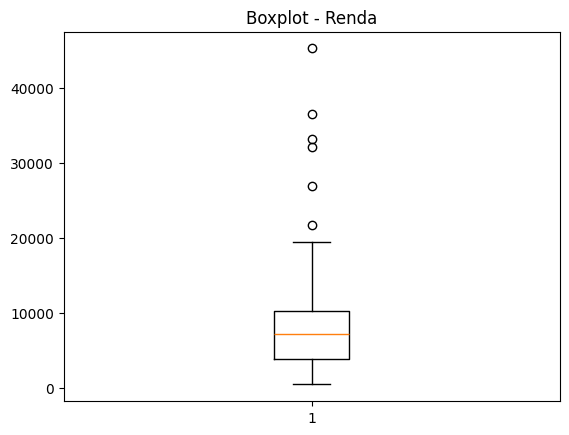

In [16]:
plt.boxplot(df['renda'])
plt.title("Boxplot - Renda")
plt.show()

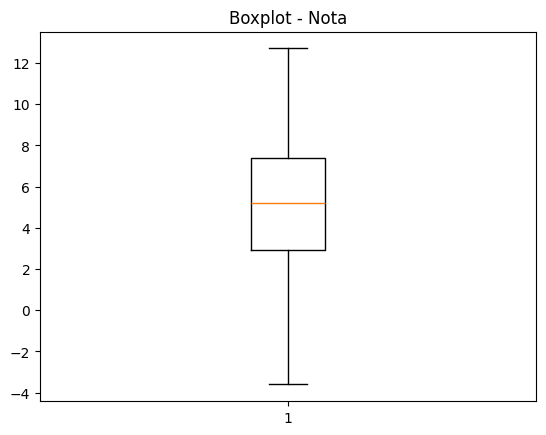

In [17]:
plt.boxplot(df['nota'])
plt.title("Boxplot - Nota")
plt.show()

In [18]:
# Realiza a códificação das coluas
#encoder = OneHotEncoder(sparse_output=False, drop='first')  
encoder = OneHotEncoder(sparse_output=False)  

#categorias_codificadas = encoder.fit_transform(df[['cidade', 'categoria', 'feedback']])
categorias_codificadas = encoder.fit_transform(df[['cidade']])

# Converter os resultados do encoding para um DataFrame
#df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade', 'categoria', 'feedback']))
df_categorias = pd.DataFrame(categorias_codificadas, columns=encoder.get_feature_names_out(['cidade']))

# Resetar o índice do df original e concatenar com as novas colunas
df_final = pd.concat([df.reset_index(drop=True), df_categorias], axis=1)

# Remover as colunas categóricas originais (sem usar inplace)
#df_final = df_final.drop(['cidade', 'categoria', 'feedback'], axis=1)
df_final = df_final.drop(['cidade'], axis=1)

In [19]:
df_final.head()

,id,idade,renda,categoria,nota,feedback,cidade_Belo Horizonte,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,cidade_nan
0,1,65.0,8912.270000,B,5.136207,Bom,1.0,0.0,0.0,0.0,0.0
1,2,51.0,2668.900000,B,0.600000,Ruim,1.0,0.0,0.0,0.0,0.0
2,3,35.0,7213.230515,B,4.400000,Regular,0.0,0.0,0.0,1.0,0.0
3,4,45.0,3417.560000,B,1.300000,Bom,0.0,0.0,1.0,0.0,0.0
4,5,56.0,7536.570000,A,8.600000,NaN,0.0,1.0,0.0,0.0,0.0


In [21]:
scaler = StandardScaler()
df_final[['idade', 'renda', 'nota']] = scaler.fit_transform(df_final[['idade', 'renda', 'nota']])


In [23]:
print(df_final[['idade', 'renda', 'nota']].head(10))

      idade         renda          nota
0  1.385613  4.174972e-01 -6.180782e-16
1  0.508397 -1.116658e+00 -1.578360e+00
2 -0.494136 -2.234860e-16 -2.561610e-01
3  0.132447 -9.326927e-01 -1.334797e+00
4  0.821688  7.945273e-02  1.205217e+00
5  0.633713  1.504551e-01  1.066038e+00
6 -0.932744 -1.024029e+00 -4.649293e-01
7 -1.434011  6.537155e-01 -1.865716e-01
8 -1.371352 -1.009973e+00  9.964485e-01
9  0.821688  1.114806e-01  1.413985e+00


In [24]:
df_final[['idade', 'renda', 'nota']].describe()

,idade,renda,nota
count,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.847411e-16,-1.278977e-16,-2.753353e-16
std,1.000500e+00,1.000500e+00,1.000500e+00
min,-2.499202e+00,-1.656096e+00,-3.039738e+00
25%,-8.700859e-01,-8.327537e-01,-7.780817e-01
50%,7.130300e-03,-4.442842e-03,2.219662e-02
75%,8.216882e-01,7.537988e-01,7.876802e-01
max,4.831819e+00,9.362015e+00,2.631800e+00


In [25]:
df_final.head(10)

,id,idade,renda,categoria,nota,feedback,cidade_Belo Horizonte,cidade_Rio de Janeiro,cidade_São Paulo,cidade_Vitória,cidade_nan
0,1,1.385613,4.174972e-01,B,-6.180782e-16,Bom,1.0,0.0,0.0,0.0,0.0
1,2,0.508397,-1.116658e+00,B,-1.578360e+00,Ruim,1.0,0.0,0.0,0.0,0.0
2,3,-0.494136,-2.234860e-16,B,-2.561610e-01,Regular,0.0,0.0,0.0,1.0,0.0
3,4,0.132447,-9.326927e-01,B,-1.334797e+00,Bom,0.0,0.0,1.0,0.0,0.0
4,5,0.821688,7.945273e-02,A,1.205217e+00,NaN,0.0,1.0,0.0,0.0,0.0
5,6,0.633713,1.504551e-01,B,1.066038e+00,Regular,0.0,0.0,1.0,0.0,0.0
6,7,-0.932744,-1.024029e+00,B,-4.649293e-01,Regular,1.0,0.0,0.0,0.0,0.0
7,8,-1.434011,6.537155e-01,B,-1.865716e-01,Bom,0.0,1.0,0.0,0.0,0.0
8,9,-1.371352,-1.009973e+00,B,9.964485e-01,Regular,0.0,0.0,0.0,1.0,0.0
9,10,0.821688,1.114806e-01,A,1.413985e+00,Bom,1.0,0.0,0.0,0.0,0.0


In [26]:
df_final.to_csv('dataset_sudeste_simples_realista_outliers-1FASE1.csv')